## Explanation
This code is used to compute the duct friction hyperplanes. First an example with simple spacing is given, then one with a better spacing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ruamel.yaml import YAML

This code is used to compute the duct friction hyperplanes. First an example with simple spacing is given, then one with a better spacing.

In [2]:
def f(x, y):
    return (y + x) / (y**3 * x**3)

def df_dx(x, y):
    return (-3*y - 2*x) / (y**3 * x**4)

def df_dy(x, y):
    return (-3*x - 2*y) / (y**4 * x**3)


## Simple spacing

In [3]:
# Calculate the function values
x = np.linspace(0.2, 2, 30)
y = np.linspace(0.2, 2, 30)

In [4]:
from underestimating_hyperplanes import sample_over_grid_nd, compute_tangential_planes_equation, tangential_planes_to_array
points = sample_over_grid_nd([x,y])

tangential_planes = compute_tangential_planes_equation(points, f, [df_dx, df_dy])

tangential_planes = tangential_planes_to_array(tangential_planes)

print(f"len tangential planes {len(tangential_planes)}")

len tangential planes 900


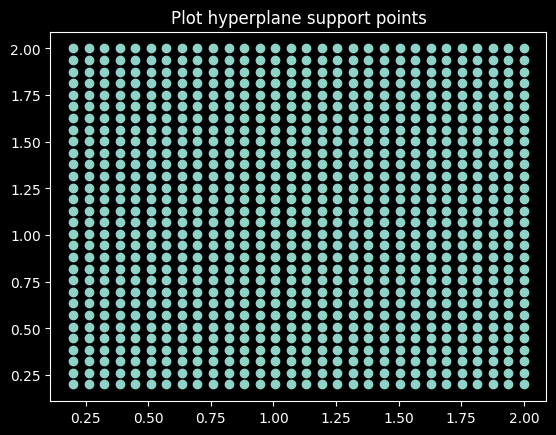

In [5]:
plt.title("Plot hyperplane support points")
plt.scatter(points[:,0],points[:,1])

plotting the tangents and the exact value

(0.0, 6562.496874999998)

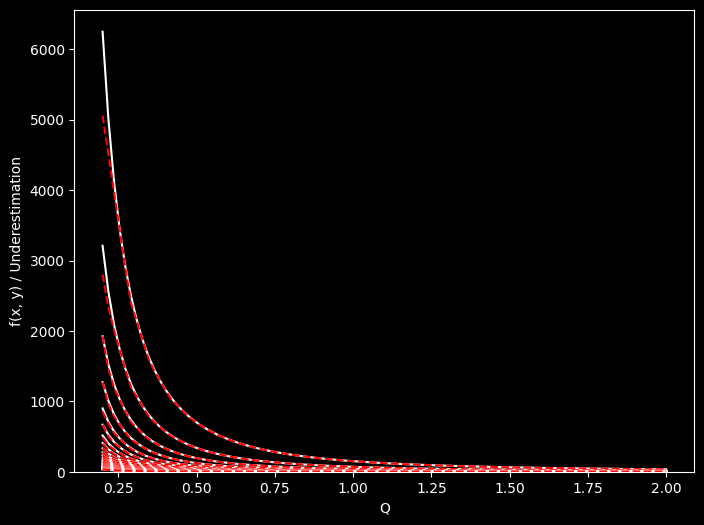

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

x_plot = np.linspace(0.2,2,100)

def f_underestimate_tangential(x,y):
    return max(z0 + mx*x + my*y for (z0, mx, my) in tangential_planes)

for yi in y:
    plt.plot(x_plot, f(x_plot, yi), "-", color="k")

    simplice_under_vals, tangential_under_vals = [], []
    tangential_under_vals = []
    for xi in x_plot:
        tangential_plane_vals = [z0 + mx*xi + my*yi for (z0, mx, my, *_) in tangential_planes]
        tangential_under_vals.append(tangential_plane_vals)
        fval = f(xi,yi)

        tangential_planes = [
            plane for plane, under_val in zip(tangential_planes, tangential_plane_vals)
            if under_val <= fval
        ]


for yi in y:
    plt.plot(x_plot, f(x_plot, yi), "-", color="w")

    simplice_under_vals, tangential_under_vals = [], []
    tangential_under_vals = []
    for xi in x_plot:
        tangential_plane_vals = [z0 + mx*xi + my*yi for (z0, mx, my, *_) in tangential_planes]
        tangential_under_vals.append(max(tangential_plane_vals))

    plt.plot(x_plot, tangential_under_vals, '--', color="red")

plt.xlabel("Q")
plt.ylabel("f(x, y) / Underestimation")

plt.ylim(bottom=0)

## Advanced spacing

In [7]:
r2 = np.logspace(np.log10(0.2),np.log10(2),15)
phi2 = np.array([
    np.arctan(1/3),
    np.pi/4+5/180*np.pi-np.arctan(1/3),
    np.pi/4-5/180*np.pi+np.arctan(1/3),
    np.pi/2-np.arctan(1/3)])

x2 = np.array([(ri)*np.sin(phii) for ri in r2 for phii in phi2])
y2 = np.array([(ri)*np.cos(phii) for ri in r2 for phii in phi2])

n_diag = 20
r1 = np.logspace(np.log10(0.2), np.log10(2),n_diag)

x = np.concatenate([r1,x2])
y = np.concatenate([r1,y2])

points = np.array([(xi, yi) for xi,yi in zip(x,y) if (xi >= 0.2) and (yi >= 0.2)])
len(points)

58

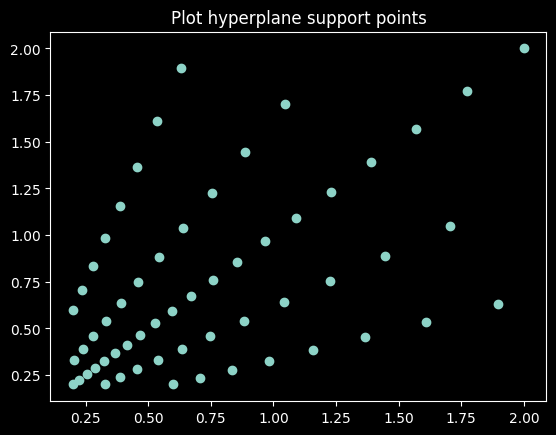

In [8]:
plt.title("Plot hyperplane support points")
plt.scatter(points[:,0],points[:,1])

In [9]:
from underestimating_hyperplanes import compute_tangential_planes_equation, tangential_planes_to_array

tangential_planes = compute_tangential_planes_equation(points, f, [df_dx, df_dy])

tangential_planes = tangential_planes_to_array(tangential_planes)

(0.0, 6562.496874999998)

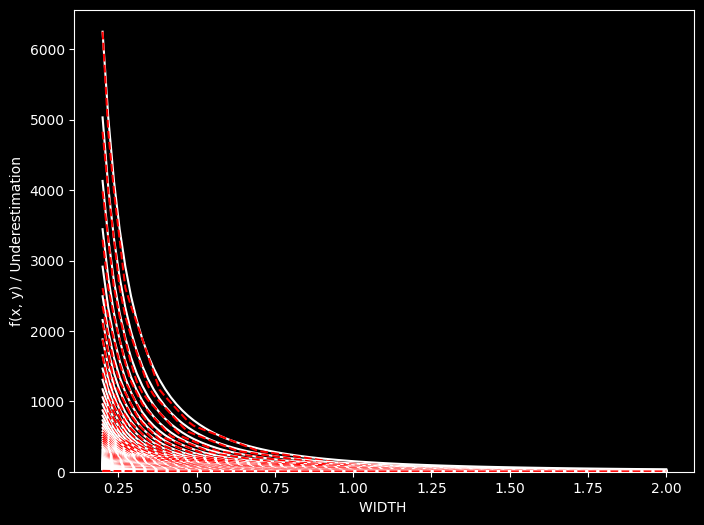

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

x_plot = np.linspace(0.2,2,100)
y_plot = np.linspace(0.2,2,100)

def f_underestimate_tangential(x,y):
    return max(z0 + mx*x + my*y for (z0, mx, my) in tangential_planes)

for yi in y_plot:
    plt.plot(x_plot, f(x_plot, yi), "-", color="k")

    simplice_under_vals, tangential_under_vals = [], []
    tangential_under_vals = []
    for xi in x_plot:
        tangential_plane_vals = [z0 + mx*xi + my*yi for (z0, mx, my, *_) in tangential_planes]
        tangential_under_vals.append(tangential_plane_vals)
        fval = f(xi,yi)

        tangential_planes = [
            plane for plane, under_val in zip(tangential_planes, tangential_plane_vals)
            if under_val <= fval
        ]

for yi in y_plot:
    plt.plot(x_plot, f(x_plot, yi), "-", color="w")

    simplice_under_vals, tangential_under_vals = [], []
    tangential_under_vals = []
    for xi in x_plot:
        tangential_plane_vals = [z0 + mx*xi + my*yi for (z0, mx, my, *_) in tangential_planes]
        tangential_under_vals.append(max(tangential_plane_vals))

    plt.plot(x_plot, tangential_under_vals, '--', color="red")

plt.xlabel("WIDTH ")
plt.ylabel("f(x, y) / Underestimation")

plt.ylim(bottom=0)

save the result

In [11]:
from underestimating_hyperplanes import tangential_planes_to_dict
yaml_dict = tangential_planes_to_dict(tangential_planes, ["width", "height"])

yaml = YAML()
yaml.default_flow_style = False
with open("output_duct_example_hyperplanes.yaml", "w") as f:
    yaml.dump(yaml_dict, f)